<H1>Migration velocity</H1>
<P> To compute the velocity and acceleration from the trajectories of several particles, we generated a file with the 3D coordinates (Position X, Position Y and Position Z).

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read CSV file in pandas
csv = pd.read_csv('.data/Julie_R1_Bef_S4_cell123_Position.csv', skiprows=2) 
csv.head()

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,TrackID,ID,Unnamed: 9
0,0.114292,0.713745,0.001603,um,Spot,Position,1,1000000000,0,NaN
1,0.150438,1.660180,0.001603,um,Spot,Position,1,1000000001,1,NaN
2,0.121118,0.706334,0.001603,um,Spot,Position,2,1000000000,2,NaN
3,0.165299,1.648750,0.001603,um,Spot,Position,2,1000000001,3,NaN
4,0.130966,0.696218,0.001603,um,Spot,Position,3,1000000000,4,NaN


<H2>Select particles by ID</H2>

In [3]:
# get basic information
print('Number of samples %d'%len(csv))
print('Number of cells = %d'%len(csv['TrackID'].unique()))
print('Distance units = %s'%csv['Unit'][0])


Number of samples 317
Number of cells = 3
Distance units = um


In [4]:
# get TrackIDs
TrackID = csv['TrackID'].unique() 

# select only locations, sampling points and TrackIDs
df = csv[['Position X','Position Y', 'Position Z', 'Time','TrackID']]
         
df0 = df.loc[df['TrackID'] == TrackID[0]]
df1 = df.loc[df['TrackID'] == TrackID[1]]
df2 = df.loc[df['TrackID'] == TrackID[2]]

counter = 0
for i in TrackID:
    mysize =  len( df.loc[df['TrackID'] == i] )
    counter +=mysize
    print('Number of samples in TrackID = %d is %d'%(i,mysize))
    
print('Total number of samples %d'%counter)

df0.head() # show first values of first particle

Number of samples in TrackID = 1000000000 is 143
Number of samples in TrackID = 1000000001 is 144
Number of samples in TrackID = 1000000002 is 30
Total number of samples 317


,Position X,Position Y,Position Z,Time,TrackID
0,0.114292,0.713745,0.001603,1,1000000000
2,0.121118,0.706334,0.001603,2,1000000000
4,0.130966,0.696218,0.001603,3,1000000000
6,0.139687,0.691904,0.001603,4,1000000000
8,0.138784,0.688762,0.001603,5,1000000000


In [5]:
# collect a list of 3d coordantes

P0 = zip(df0['Position X'], df0['Position Y'], df0['Position Z'])
P1 = zip(df1['Position X'], df1['Position Y'], df1['Position Z'])
P2 = zip(df2['Position X'], df2['Position Y'], df2['Position Z'])
P0[0] # test the values are correct

(0.114292, 0.71374499999999996, 0.00160257)

<H2>Distances </H2>

In [6]:
def distance(myarray):
    """
    Calculate the distance between 2 3D coordinates along the 
    axis of the numpy array.
    
    """
    # slice() method is useful for large arrays
    # see diff in ./local/lib/python2.7/site-packages/numpy/lib/function_base.py
    a = asanyarray(myarray)
    nd = a.ndim
    slice1 = [slice(None)] # create a slice type object
    slice2 = [slice(None)]
    slice1[-1] = slice(1, None)  # like array[1:] 
    slice2[-1] = slice(None, -1) # like array[:-1]
    slice1 = tuple(slice1)
    slice2 = tuple(slice2)

    # calculate sqrt( dx^2 + dy^2 + dz^2)
    sum_squared = np.sum( np.power(a[slice2]-a[slice1],2), axis=1)
    return np.sqrt( sum_squared)

<H2>Velocities</H2>
<P>Assuming constant sampling interval velocity is proportional to the distance travelled</P>

In [7]:
# transform distances in nm


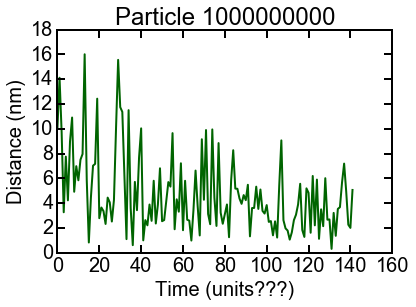

In [8]:
plt.plot(distance(P0)*1000, color = '#006400')

plt.ylabel('Distance (nm)'), 
plt.xlabel('Time (units???)')
plt.title('Particle %d'%TrackID[0]);

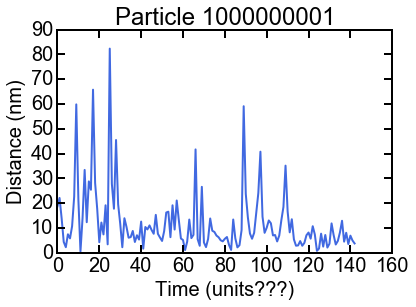

In [9]:
plt.plot(distance(P1)*1000, color = '#4169E1')
plt.xlabel('Time (units???)')
plt.ylabel('Distance (nm)'), plt.title('Particle %d'%TrackID[1]);

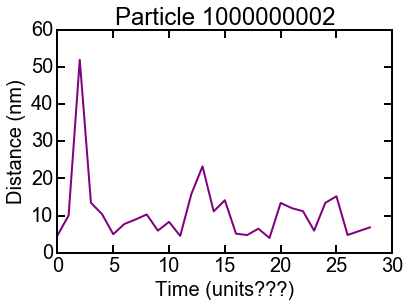

In [10]:
plt.plot(distance(P2)*1000, color = '#800080')
plt.xlabel('Time (units???)')
plt.ylabel('Distance (nm)'), plt.title('Particle %d'%TrackID[2]);

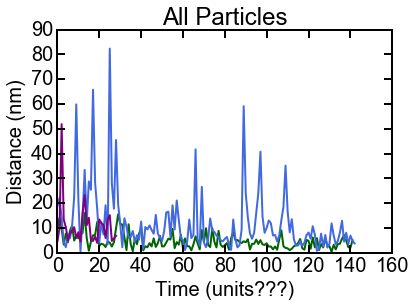

In [11]:
#Overlap
plt.plot(distance(P0)*1000, color = '#006400')
plt.plot(distance(P1)*1000, color = '#4169E1')
plt.plot(distance(P2)*1000, color = '#800080')
plt.xlabel('Time (units???)')
plt.ylabel('Distance (nm)'), plt.title('All Particles');

<H2>Acceleration</H2>
First derivative of time


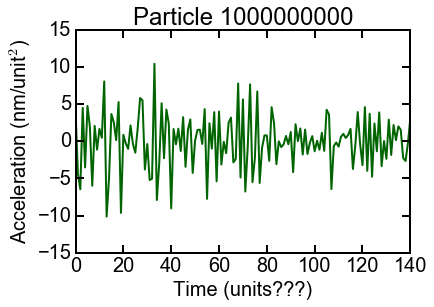

In [12]:
plt.plot( np.diff( distance(P0)*1000 ), color = 'darkgreen' )
plt.xlabel('Time (units???)')
plt.ylabel('Acceleration (nm/unit$^2$)'), plt.title('Particle %d'%TrackID[0]);

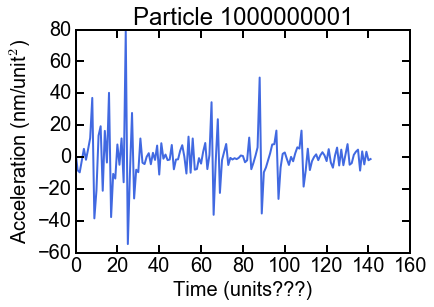

In [13]:
plt.plot( np.diff( distance(P1)*1000 ) , color = 'royalblue')
plt.xlabel('Time (units???)')
plt.ylabel('Acceleration (nm/unit$^2$)'), plt.title('Particle %d'%TrackID[1]);

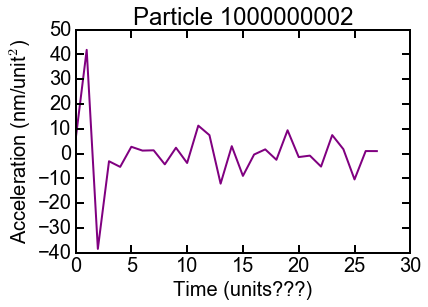

In [14]:
plt.plot(np.diff(distance(P2)*1000), color = 'purple')
plt.xlabel('Time (units???)')
plt.ylabel('Acceleration (nm/unit$^2$)'), plt.title('Particle %d'%TrackID[2]);